In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
x, y = fetch_california_housing(return_X_y=True)

In [4]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [6]:
lr=LinearRegression()

In [7]:
lr.fit(X_train,Y_train)
Y=lr.predict(X_test)

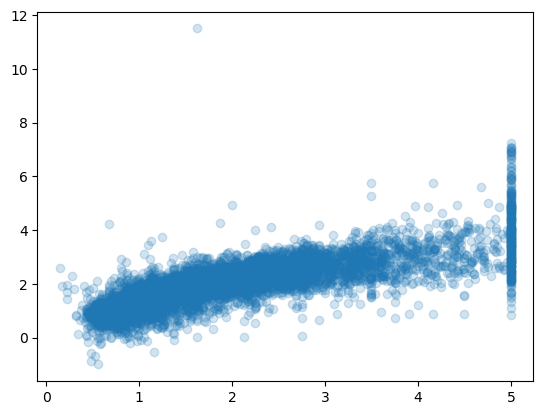

In [8]:
plt.scatter(Y_test,Y,alpha=0.2)

In [9]:
x_min,x_max=Y_train.min()-1,Y_train.max()+1
y_min,y_max=Y_test.min()-1,Y_test.max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
grid_pts=np.c_[xx.ravel(),yy.ravel()]

In [10]:
xx.shape

(686, 686)

In [11]:
grid_pts.shape

(470596, 2)

In [12]:
pred=lr.predict(grid_pts.reshape((-1,8)))

In [13]:
pred=pred.reshape((343,343))

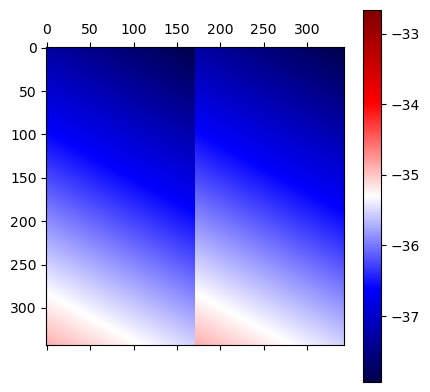

In [14]:
plt.matshow(pred,cmap='seismic')
plt.colorbar()

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler,QuantileTransformer,SplineTransformer
from sklearn.pipeline import Pipeline,make_pipeline

In [16]:
knn=KNeighborsRegressor()
pipe=make_pipeline(
    ('scale',StandardScaler()),
    ('model',KNeighborsRegressor())
)

In [17]:
knn_score=cross_val_score(knn,X_train,Y_train,cv=10,scoring='r2')

In [18]:
print(knn_score)

[0.10752499 0.17134736 0.10438986 0.12907066 0.10185625 0.1285525
 0.14421108 0.09389541 0.08513839 0.11503729]


In [19]:
import pandas as pd

In [20]:
df=pd.DataFrame(x,y)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20640 entries, 4.526 to 0.894
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
 1   1       20640 non-null  float64
 2   2       20640 non-null  float64
 3   3       20640 non-null  float64
 4   4       20640 non-null  float64
 5   5       20640 non-null  float64
 6   6       20640 non-null  float64
 7   7       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [21]:
df.describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [22]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,make_scorer,r2_score

In [24]:
grid=GridSearchCV(estimator=knn,
                  param_grid={
                      'weights':['uniform','distance'],
                      'n_neighbors':[i for i in range(1,15)]
                  },
                 scoring={'r2':make_scorer(r2_score)},
                 refit='r2',
                 cv=10,
                 n_jobs=-1)

In [25]:
grid.fit(X_train,Y_train)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.029067,0.011939,0.016291,0.001537,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",-0.174396,-0.169064,-0.305334,-0.203864,-0.190268,-0.199884,-0.124212,-0.348423,-0.330770,-0.280525,-0.232674,0.073144,27
1,0.026336,0.006438,0.019952,0.010451,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",-0.174396,-0.169064,-0.305334,-0.203864,-0.190268,-0.199884,-0.124212,-0.348423,-0.330770,-0.280525,-0.232674,0.073144,27
2,0.022406,0.001183,0.017316,0.001583,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.015381,0.092218,-0.018262,0.021915,0.045430,0.048808,0.074613,-0.056245,-0.050246,-0.000181,0.017343,0.047168,26
3,0.024941,0.003703,0.018732,0.008068,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.033179,0.099900,-0.001780,0.033675,0.051598,0.064790,0.090040,-0.051013,-0.038157,0.008369,0.029060,0.047821,25
4,0.022563,0.001590,0.016557,0.001592,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.070779,0.143600,0.069510,0.099515,0.096756,0.115294,0.128459,0.021597,0.083201,0.054841,0.088355,0.034426,24
5,0.026609,0.006149,0.017767,0.002161,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.092928,0.165002,0.086739,0.117275,0.111516,0.139169,0.147274,0.034051,0.093608,0.070716,0.105828,0.036823,23
6,0.022985,0.001806,0.020230,0.003848,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.093885,0.164139,0.093786,0.109839,0.111536,0.122282,0.132832,0.069259,0.085804,0.103132,0.108649,0.025303,22
7,0.022364,0.001413,0.018112,0.001502,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.121712,0.190267,0.114455,0.138875,0.132801,0.153077,0.163628,0.082380,0.104619,0.120413,0.132223,0.029405,16
8,0.029615,0.007968,0.024274,0.006725,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.107525,0.171347,0.104390,0.129071,0.101856,0.128553,0.144211,0.093895,0.085138,0.115037,0.118102,0.024479,21
9,0.037553,0.009841,0.033705,0.009416,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.137221,0.199748,0.128670,0.159657,0.129467,0.162569,0.181296,0.107132,0.109925,0.134635,0.145032,0.028598,10


In [26]:
grid.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [27]:
from sklearn.datasets import make_blobs

In [28]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2, random_state=42)

In [29]:
blobs_df=pd.DataFrame({'x1':x[:,0],
                       'x2':x[:,1]})

In [30]:
# g=sns.PairGrid(blobs_df[['x1','x2','x3','x4','x5']],diag_sharey=False)
# g.map_offdiag(sns.scatterplot,alpha=0.5)
# g.map_diag(sns.histplot)

In [31]:
# from sklearn.manifold import TSNE
# tsne=TSNE(n_components=2,perplexity=7)
# a=tsne.fit_transform(x)

In [32]:
blobs_df['y1']=x[:,0]
blobs_df['y2']=x[:,1]

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import rand_score,normalized_mutual_info_score,davies_bouldin_score,calinski_harabasz_score,silhouette_score

In [34]:
eps=[i*0.5 for i in range(2,11)]
eps

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [35]:
sil_score=[]
ari=[]
nmi=[]
dbi=[]
chi=[]
for i in eps:
    dbscan=DBSCAN(eps=i,min_samples=2)
    dbscan.fit(x)
    ari.append(rand_score(y,dbscan.labels_))
    nmi.append(normalized_mutual_info_score(y,dbscan.labels_))
    dbi.append(davies_bouldin_score(x,dbscan.labels_))
    chi.append(calinski_harabasz_score(x,dbscan.labels_))
    sil_score.append(silhouette_score(x,dbscan.labels_))

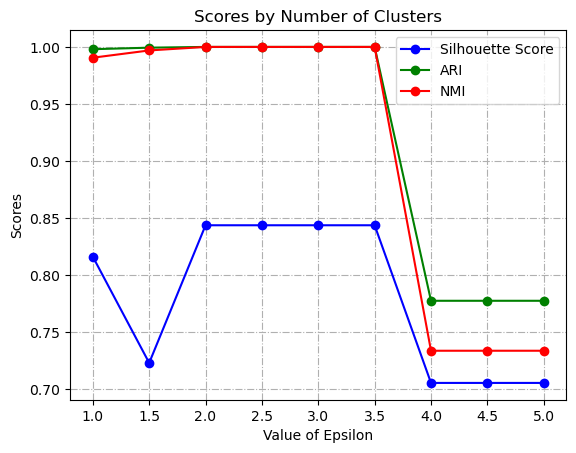

In [36]:
plt.plot(eps,sil_score,marker='o',label='Silhouette Score',c='b')
plt.plot(eps,ari,marker='o',label='ARI',c='g')
plt.plot(eps,nmi,marker='o',label='NMI',c='r')
plt.xticks(eps)
plt.ylabel("Scores")
plt.xlabel("Value of Epsilon")
plt.title("Scores by Number of Clusters")
plt.grid(True,linestyle='-.')
plt.legend()
plt.show()

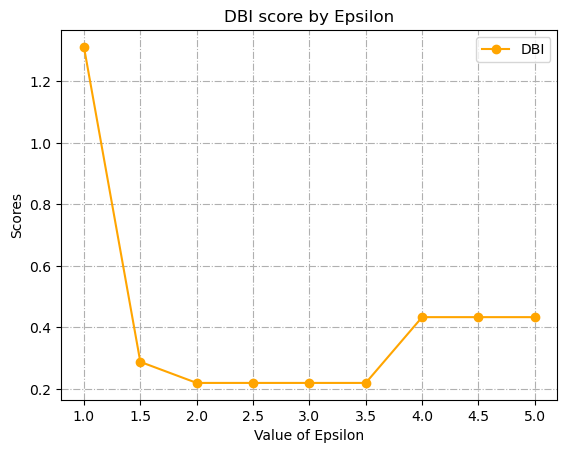

In [37]:
plt.plot(eps,dbi,marker='o',label='DBI',c='orange')
plt.title("DBI score by Epsilon")
plt.xlabel("Value of Epsilon")
plt.ylabel("Scores")
plt.legend()
plt.grid(True,linestyle='-.')
plt.show()

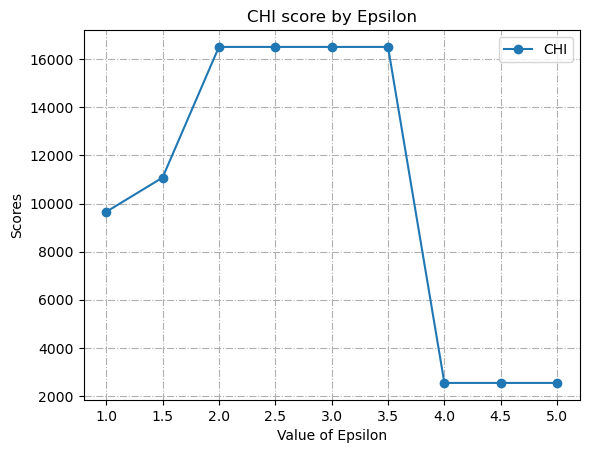

In [38]:
plt.plot(eps,chi,marker='o',label='CHI')
plt.title("CHI score by Epsilon")
plt.xlabel("Value of Epsilon")
plt.ylabel("Scores")
plt.legend()
plt.grid(True,linestyle='-.')
plt.show()

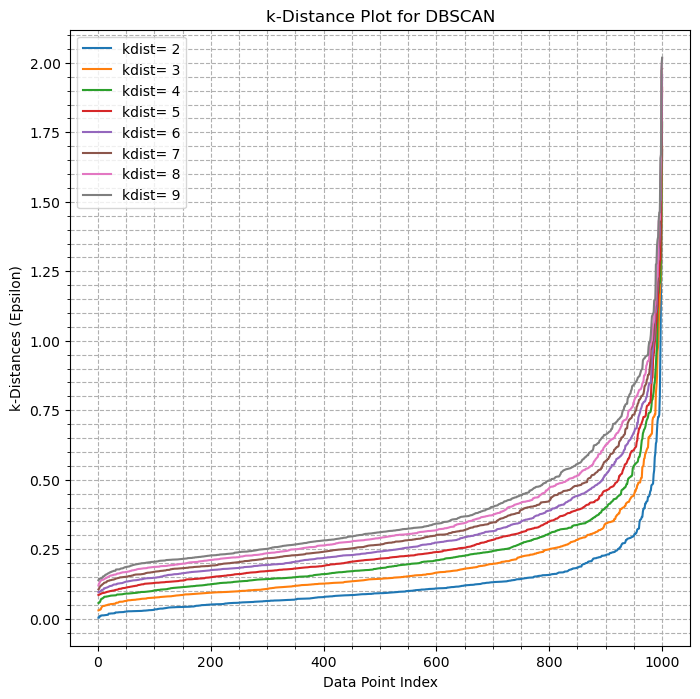

In [39]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
plt.figure(figsize=(8,8))
# Create an instance of NearestNeighbors
for k in range(2,10):
    
    nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(x)

    # Find distances and indices of k-nearest neighbors
    distances, indices = nbrs.kneighbors(x)
    k_distances = distances[:, -1]  # Get the distance to the k-th nearest neighbor
    k_distances = np.sort(k_distances)
    
    plt.plot(np.arange(1, len(k_distances) + 1), k_distances,label=f'kdist= {k}')

plt.xlabel('Data Point Index')
plt.ylabel('k-Distances (Epsilon)')
plt.title('k-Distance Plot for DBSCAN')
plt.minorticks_on()
plt.legend()
plt.grid(True,which='both',linestyle='--')
plt.show()

#K-DIST PLOT INDICATES VALUE BETWEEN 2.0 AND 2.2 TO BE IDEAL FOR EPSILON

Text(0, 0.5, 'Reachability Distance')

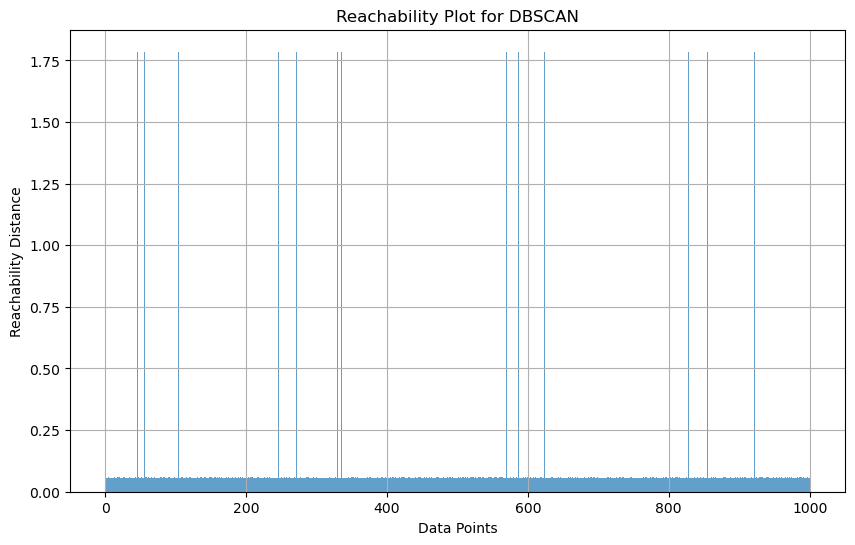

In [40]:
k=4
min_samples=5

nbrs=NearestNeighbors(n_neighbors=k,metric='euclidean').fit(x)
dist,_ = nbrs.kneighbors(x)
k_dist=np.sort(dist[:,-1])

dbscan=DBSCAN(eps=0.7,min_samples=min_samples)
dbscan.fit(x)

labels=dbscan.labels_

plt.figure(figsize=(10, 6))
plt.bar(range(1,len(x)+1),k_dist[labels],alpha=0.7,width=1)
plt.grid(True)
plt.title("Reachability Plot for DBSCAN")
plt.xlabel("Data Points")
plt.ylabel("Reachability Distance")

#REACHABILITY PLOT INDICATES 4 TO BE IDEAL VALUE FOR MIN-SAMPLES AS 5 PEAKS DETECTED SO (n-1) 4 PEAKS ARE IDEAL

In [41]:
dbscan=DBSCAN(eps=1.8,min_samples=4)
dbscan.fit(x)

blobs_df['dbscan']=dbscan.labels_

In [42]:
blobs_df['dbscan'].unique()

array([0, 1, 2])

Text(0.5, 1.0, 'DBSCAN Clustering')

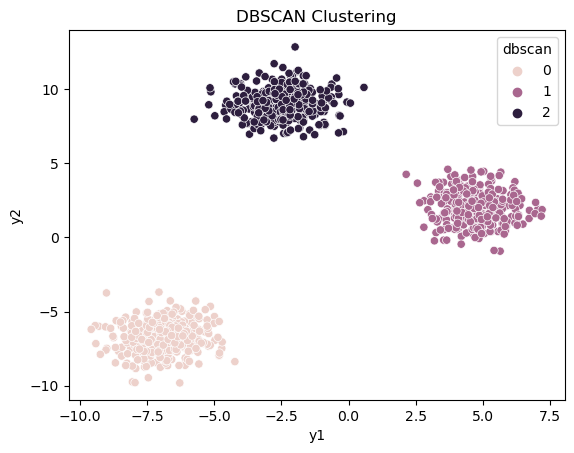

In [43]:
sns.scatterplot(data=blobs_df,x='y1',y='y2',hue='dbscan')
plt.title("DBSCAN Clustering")

In [44]:
km=KMeans()

In [45]:
x_min,x_max=x.min()-1,x.max()+1
y_min,y_max=x.min()-1,x.max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
grid_pts=np.c_[xx.ravel(),yy.ravel()]

In [46]:
km=KMeans(n_clusters=3,random_state=42,n_init=7)
km.fit(x)
blobs_df['kmeans']=km.labels_

In [47]:
labels=km.predict(grid_pts)

In [48]:
xx.shape

(2469, 2469)

In [49]:
labels=labels.reshape(2469,2469)

In [50]:
labels.shape

(2469, 2469)

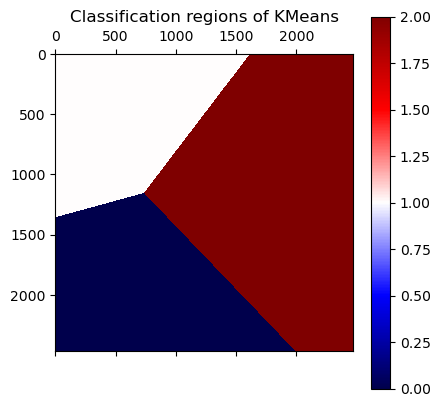

In [51]:
plt.matshow(labels,cmap='seismic')
plt.title("Classification regions of KMeans")
plt.colorbar()

In [52]:
sil_score=[]
ari=[]
nmi=[]
dbi=[]
chi=[]
for i in range(2,12):
    sc=SpectralClustering(n_clusters=i,random_state=42,affinity='laplacian')
    sc.fit(x)
    ari.append(rand_score(y,sc.labels_))
    nmi.append(normalized_mutual_info_score(y,sc.labels_))
    dbi.append(davies_bouldin_score(x,sc.labels_))
    chi.append(calinski_harabasz_score(x,sc.labels_))
    sil_score.append(silhouette_score(x,sc.labels_))

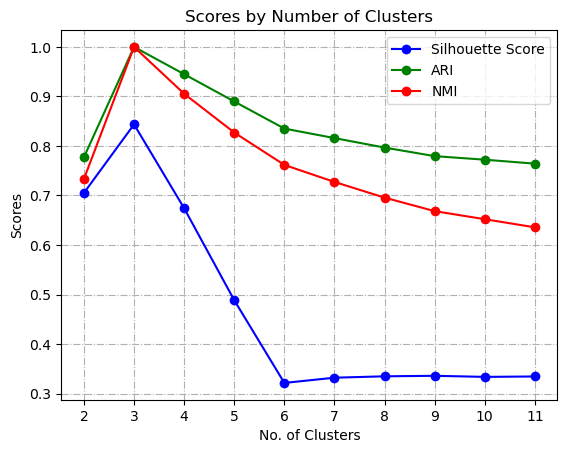

In [53]:
plt.plot(range(2,12),sil_score,marker='o',label='Silhouette Score',c='b')
plt.plot(range(2,12),ari,marker='o',label='ARI',c='g')
plt.plot(range(2,12),nmi,marker='o',label='NMI',c='r')
plt.xticks(range(2,12))
plt.ylabel("Scores")
plt.xlabel("No. of Clusters")
plt.title("Scores by Number of Clusters")
plt.grid(True,linestyle='-.')
plt.legend()
plt.show()

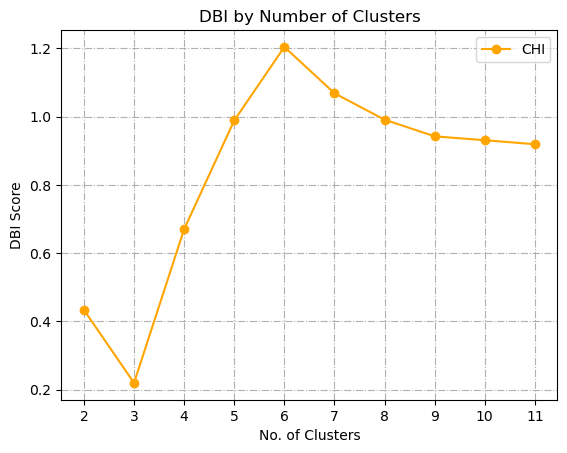

In [54]:
plt.plot(range(2,12),dbi,marker='o',label='CHI',c='orange')
plt.ylabel("DBI Score")
plt.xlabel("No. of Clusters")
plt.title("DBI by Number of Clusters")
plt.grid(True,linestyle='-.')
plt.xticks(range(2,12))
plt.legend()
plt.show()

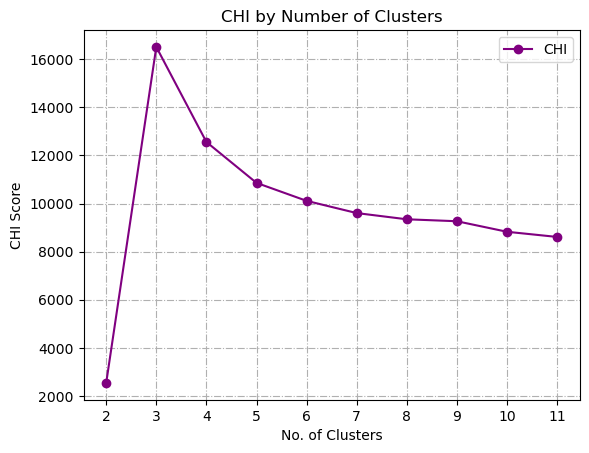

In [55]:
plt.plot(range(2,12),chi,marker='o',label='CHI',c='purple')
plt.ylabel("CHI Score")
plt.xlabel("No. of Clusters")
plt.title("CHI by Number of Clusters")
plt.grid(True,linestyle='-.')
plt.xticks(range(2,12))
plt.legend()
plt.show()

In [56]:
sc=SpectralClustering(affinity='laplacian',random_state=42,n_clusters=3)
sc.fit(x)

SpectralClustering(affinity='laplacian', n_clusters=3, random_state=42)

In [57]:
blobs_df['spectral']=sc.labels_

Text(0.5, 1.0, 'Spectral Clustering')

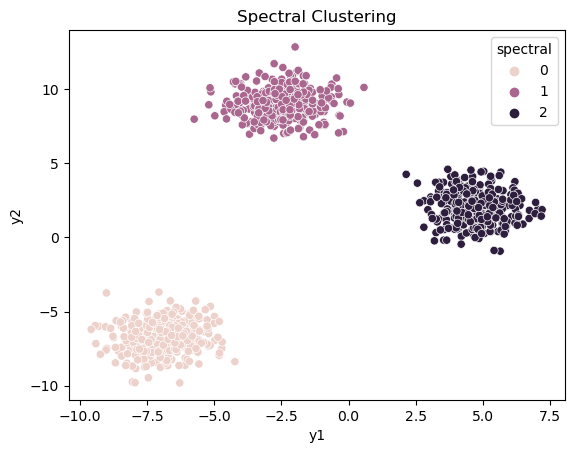

In [58]:
sns.scatterplot(data=blobs_df,x='y1',y='y2',hue='spectral')
plt.title("Spectral Clustering")

In [59]:
wcss=[]
sil_score=[]
ari=[]
nmi=[]
dbi=[]
chi=[]
for i in range(2,12):
    km=KMeans(n_clusters=i,random_state=42,max_iter=300,n_init=10)
    km.fit(x)
    wcss.append(km.inertia_)
    ari.append(rand_score(y,km.labels_))
    nmi.append(normalized_mutual_info_score(y,km.labels_))
    dbi.append(davies_bouldin_score(x,km.labels_))
    chi.append(calinski_harabasz_score(x,km.labels_))
    sil_score.append(silhouette_score(x,km.labels_))

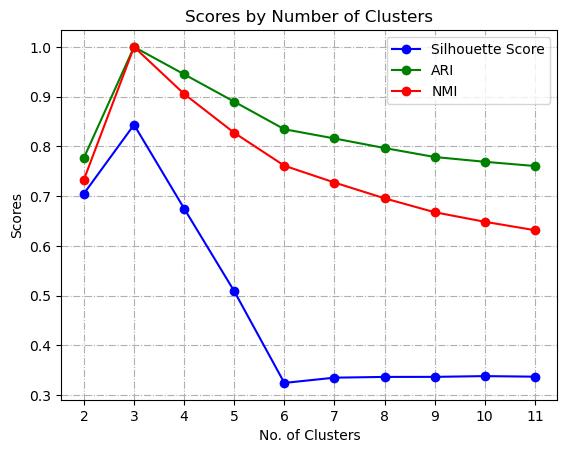

In [60]:
plt.plot(range(2,12),sil_score,marker='o',label='Silhouette Score',c='b')
plt.plot(range(2,12),ari,marker='o',label='ARI',c='g')
plt.plot(range(2,12),nmi,marker='o',label='NMI',c='r')
plt.xticks(range(2,12))
plt.ylabel("Scores")
plt.xlabel("No. of Clusters")
plt.title("Scores by Number of Clusters")
plt.grid(True,which='both',linestyle='-.')
plt.legend()
plt.show()

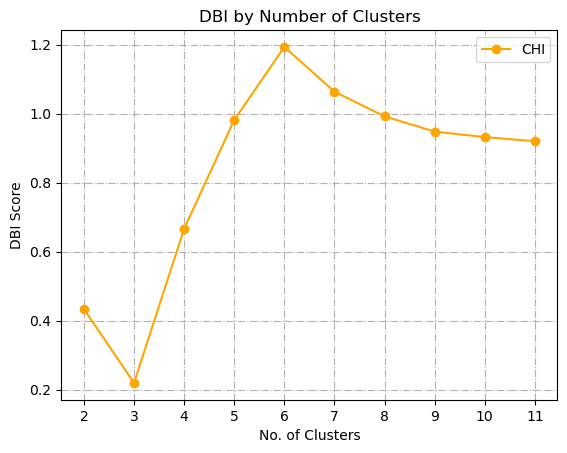

In [61]:
plt.plot(range(2,12),dbi,marker='o',label='CHI',c='orange')
plt.ylabel("DBI Score")
plt.xlabel("No. of Clusters")
plt.title("DBI by Number of Clusters")
plt.grid(True,linestyle='-.')
plt.xticks(range(2,12))
plt.legend()
plt.show()

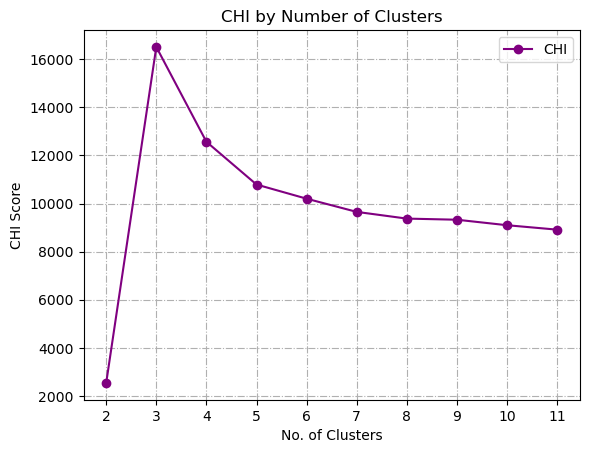

In [62]:
plt.plot(range(2,12),chi,marker='o',label='CHI',c='purple')
plt.ylabel("CHI Score")
plt.xlabel("No. of Clusters")
plt.title("CHI by Number of Clusters")
plt.grid(True,linestyle='-.')
plt.xticks(range(2,12))
plt.legend()
plt.show()

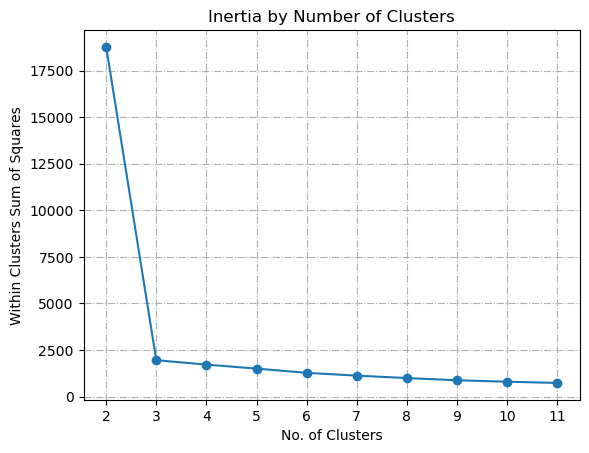

In [63]:
plt.plot(range(2,12),wcss,marker='o')
plt.xticks(range(2,12))
plt.ylabel("Within Clusters Sum of Squares")
plt.xlabel("No. of Clusters")
plt.title("Inertia by Number of Clusters")
plt.grid(True,linestyle='-.')
plt.show()

In [64]:
km=KMeans(n_clusters=3,random_state=42,n_init=7)
km.fit(x)
blobs_df['kmeans']=km.labels_

Text(0.5, 1.0, 'K-Means Clustering')

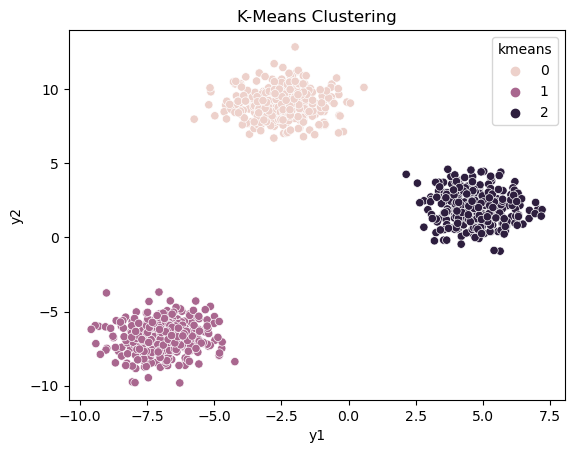

In [65]:
sns.scatterplot(data=blobs_df,x='y1',y='y2',hue='kmeans')
plt.title("K-Means Clustering")